In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading the excel file as DataFrame
data = pd.read_excel("CHURNDATA (1).xlsx")
df = pd.DataFrame(data=data)

In [3]:
#Seeing top 5 rows and columns
df.head()

,CIF,CUS_DOB,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,CUS_Customer_Since,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,...,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status
0,XXXXXX,Feb 13 1970 12:00AM,49,7116.64,MALE,MARRIED,1994-06-30,25,277,265,...,1764079.61,2378592.62,4758311.63,887,5659653.33,65,952,2231,EXECUTIVE,ACTIVE
1,XXXXXX,Sep 20 1973 12:00AM,46,1500000.00,FEMALE,SINGLE,2005-05-19,14,37,15,...,19500.00,57500.00,139363.22,97,87000.00,10,107,2223,LOW,ACTIVE
2,XXXXXX,Jul 18 1966 12:00AM,53,5000000.00,FEMALE,SINGLE,2005-05-20,14,31,14,...,240311.84,70946.86,37375.46,53,1020883.70,27,80,2222,MIDLE,ACTIVE
3,XXXXXX,Jan 9 2004 12:00AM,15,500.00,FEMALE,SINGLE,2005-05-20,14,0,1,...,28089.99,18753.92,4000.00,1,76946.96,12,13,2223,LOW,ACTIVE
4,XXXXXX,Mar 7 1971 12:00AM,48,9000000.00,FEMALE,SINGLE,2014-06-30,5,15,33,...,176000.00,70500.00,338470.29,60,442100.00,21,81,2223,LOW,ACTIVE


In [4]:
#Seeing last 5 rows and columns
df.tail()

,CIF,CUS_DOB,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,CUS_Customer_Since,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,...,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status
1244,XXXXXX,Sep 10 1951 12:00AM,68,4500.0,MALE,SINGLE,2005-07-25,14,13,12,...,0.00,0.00,5645.60,26,0.00,0,26,2223,LOW,CHURN
1245,XXXXXX,Mar 23 1984 12:00AM,35,3500000.0,MALE,SINGLE,2005-07-27,14,55,35,...,119137.62,440891.65,385735.90,127,674630.41,22,149,2222,MIDLE,ACTIVE
1246,XXXXXX,Feb 4 1985 12:00AM,34,1000.0,MALE,SINGLE,2005-07-25,14,415,368,...,733658.65,971555.27,2473621.68,1207,2641348.01,217,1424,2232,MIDLE,ACTIVE
1247,XXXXXX,Feb 3 1950 12:00AM,69,2000000.0,MALE,SINGLE,2005-07-26,14,147,202,...,532708.75,400814.60,1371852.22,583,1310768.35,48,631,2222,MIDLE,ACTIVE
1248,XXXXXX,Feb 23 1961 12:00AM,58,5000000.0,FEMALE,SINGLE,2005-07-26,14,76,88,...,422000.00,214350.00,761827.91,233,666850.00,37,270,2222,MIDLE,ACTIVE


In [5]:
df['CIF'].value_counts()
df.drop(columns=['CIF'],inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   CUS_DOB                             1249 non-null   object        
 1   AGE                                 1249 non-null   int64         
 2   CUS_Month_Income                    1238 non-null   float64       
 3   CUS_Gender                          1247 non-null   object        
 4   CUS_Marital_Status                  1249 non-null   object        
 5   CUS_Customer_Since                  1249 non-null   datetime64[ns]
 6   YEARS_WITH_US                       1249 non-null   int64         
 7   # total debit transactions for S1   1249 non-null   int64         
 8   # total debit transactions for S2   1249 non-null   int64         
 9   # total debit transactions for S3   1249 non-null   int64         
 10  total debit amount for S

## Exploratory data analysis

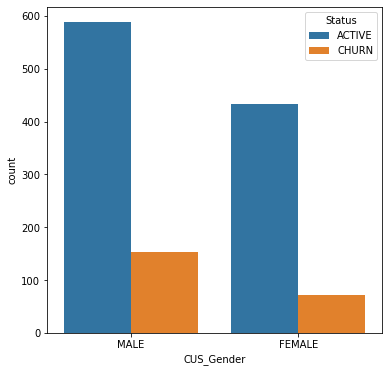

In [7]:
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x="CUS_Gender", hue="Status")
plt.show()

<Figure size 540x540 with 0 Axes>

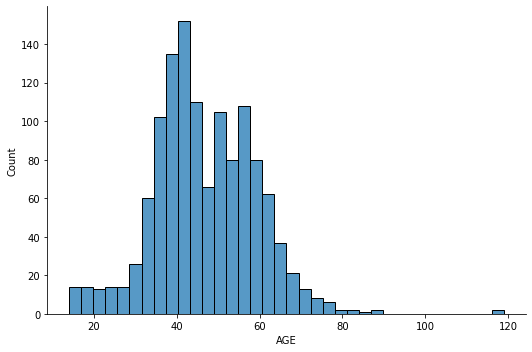

In [8]:
plt.figure(figsize=(6, 6), dpi=90)
sns.displot(df["AGE"], aspect=1.5)
plt.show()

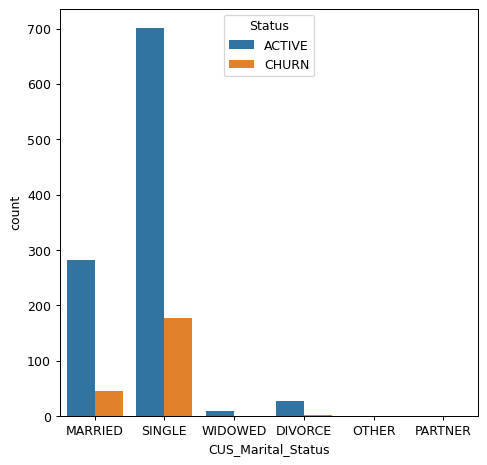

In [9]:
plt.figure(figsize=(6, 6), dpi=90)
sns.countplot(data=df, x="CUS_Marital_Status", hue="Status")
plt.show()

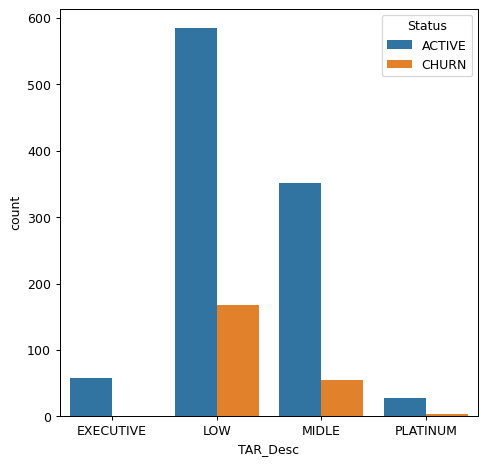

In [10]:
plt.figure(figsize=(6, 6), dpi=90)
sns.countplot(data=df, x="TAR_Desc", hue="Status")
plt.show()

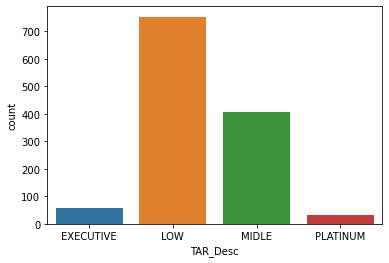

In [11]:
sns.countplot(x='TAR_Desc',data=df)
plt.show()

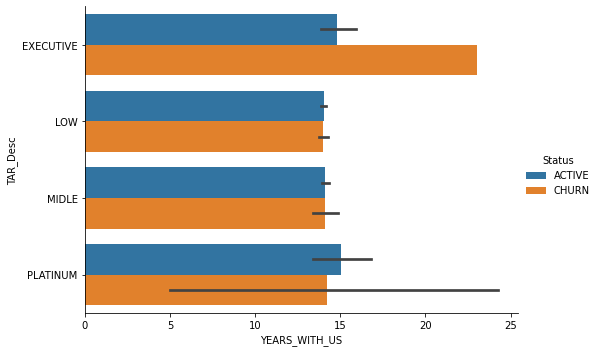

In [12]:
sns.catplot(data=df, x="YEARS_WITH_US", y="TAR_Desc", kind="bar", hue="Status", aspect=1.5)
plt.show()

In [13]:
# Converted the DOB to datetime format and set the customers year
df["CUS_birth_year"] = pd.to_datetime(df["CUS_DOB"]).dt.year

In [14]:
df["CUS_birth_year"].max()

2005

In [15]:
df["CUS_birth_year"].min()

1900

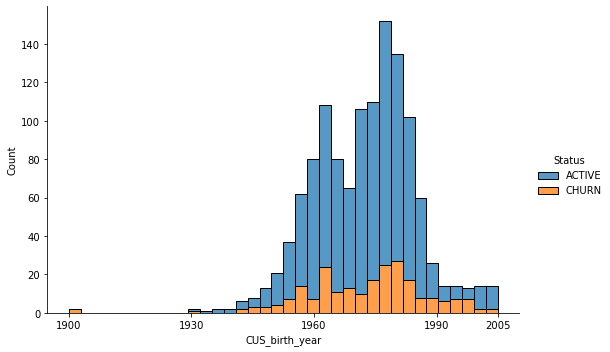

In [16]:
# plt.figure(figsize=(6, 6), dpi=90)
sns.displot(data=df, x="CUS_birth_year", hue="Status", aspect=1.5, multiple="stack")
plt.xticks([1900, 1930, 1960, 1990, 2005])
plt.show()

In [17]:
# Checking for duplicate rows
print("number of duplicates:", df.duplicated().sum())

number of duplicates: 0


In [18]:
print(df.isnull().sum())

CUS_DOB                                0
AGE                                    0
CUS_Month_Income                      11
CUS_Gender                             2
CUS_Marital_Status                     0
CUS_Customer_Since                     0
YEARS_WITH_US                          0
# total debit transactions for S1      0
# total debit transactions for S2      0
# total debit transactions for S3      0
total debit amount for S1              0
total debit amount for S2              0
total debit amount for S3              0
# total credit transactions for S1     0
# total credit transactions for S2     0
# total credit transactions for S3     0
total credit amount for S1             0
total credit amount for S2             0
total credit amount for S3             0
total debit amount                     0
total debit transactions               0
total credit amount                    0
total credit transactions              0
total transactions                     0
CUS_Target      

In [19]:
# Dropping np.nan values
df.dropna(inplace=True)

In [20]:
print(df.isnull().sum())

CUS_DOB                               0
AGE                                   0
CUS_Month_Income                      0
CUS_Gender                            0
CUS_Marital_Status                    0
CUS_Customer_Since                    0
YEARS_WITH_US                         0
# total debit transactions for S1     0
# total debit transactions for S2     0
# total debit transactions for S3     0
total debit amount for S1             0
total debit amount for S2             0
total debit amount for S3             0
# total credit transactions for S1    0
# total credit transactions for S2    0
# total credit transactions for S3    0
total credit amount for S1            0
total credit amount for S2            0
total credit amount for S3            0
total debit amount                    0
total debit transactions              0
total credit amount                   0
total credit transactions             0
total transactions                    0
CUS_Target                            0


In [21]:
remove = ["CUS_DOB", "CUS_Customer_Since","# total debit transactions for S1","# total debit transactions for S2","# total debit transactions for S3",
          "total debit amount for S1","total debit amount for S2","total debit amount for S3","total credit amount for S1","total credit amount for S2",
          "total credit amount for S3","# total credit transactions for S1","# total credit transactions for S2","# total credit transactions for S3","total transactions"]
df.drop(remove, axis=1, inplace=True)
df.head(20)


,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,YEARS_WITH_US,total debit amount,total debit transactions,total credit amount,total credit transactions,CUS_Target,TAR_Desc,Status,CUS_birth_year
0,49,7116.64,MALE,MARRIED,25,4758311.63,887,5659653.33,65,2231,EXECUTIVE,ACTIVE,1970
1,46,1500000.00,FEMALE,SINGLE,14,139363.22,97,87000.00,10,2223,LOW,ACTIVE,1973
2,53,5000000.00,FEMALE,SINGLE,14,37375.46,53,1020883.70,27,2222,MIDLE,ACTIVE,1966
3,15,500.00,FEMALE,SINGLE,14,4000.00,1,76946.96,12,2223,LOW,ACTIVE,2004
4,48,9000000.00,FEMALE,SINGLE,5,338470.29,60,442100.00,21,2223,LOW,ACTIVE,1971
5,37,2556.00,MALE,SINGLE,14,1883962.89,490,2037638.47,95,2235,MIDLE,ACTIVE,1982
6,16,200000.00,FEMALE,SINGLE,14,8693.60,3,0.00,0,2223,LOW,CHURN,2003
7,39,10000000.00,MALE,MARRIED,14,1477803.14,422,1554678.53,32,2223,LOW,ACTIVE,1980
8,46,15000000.00,MALE,MARRIED,14,3240369.08,877,3160483.36,49,2212,EXECUTIVE,ACTIVE,1973
9,59,1500000.00,FEMALE,MARRIED,14,535684.68,130,528046.93,12,2223,LOW,ACTIVE,1960


## Preprocessing

In [22]:
# preparing our target variable
df["Status"] = df["Status"].replace({"ACTIVE": 0, "CHURN": 1})

In [23]:
print(df['CUS_Gender'].value_counts())

MALE      737
FEMALE    501
Name: CUS_Gender, dtype: int64


In [24]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
df['CUS_Gender'] = lab.fit_transform(df['CUS_Gender'])
df['CUS_Gender'].head()

0    1
1    0
2    0
3    0
4    0
Name: CUS_Gender, dtype: int64

In [25]:
df['CUS_Marital_Status'] = lab.fit_transform(df['CUS_Marital_Status'])
df['CUS_Marital_Status'].head()

0    1
1    4
2    4
3    4
4    4
Name: CUS_Marital_Status, dtype: int64

In [26]:
df['TAR_Desc'] = lab.fit_transform(df['TAR_Desc'])
df['TAR_Desc'].head()

0    0
1    1
2    2
3    1
4    1
Name: TAR_Desc, dtype: int64

## Train & Test Split

In [27]:
df['Status'].value_counts()

0    1015
1     223
Name: Status, dtype: int64

In [28]:
df.columns

Index(['AGE', 'CUS_Month_Income', 'CUS_Gender', 'CUS_Marital_Status',
       'YEARS_WITH_US', 'total debit amount', 'total debit transactions',
       'total credit amount', 'total credit transactions', 'CUS_Target',
       'TAR_Desc', 'Status', 'CUS_birth_year'],
      dtype='object')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1238 entries, 0 to 1248
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   AGE                        1238 non-null   int64  
 1   CUS_Month_Income           1238 non-null   float64
 2   CUS_Gender                 1238 non-null   int64  
 3   CUS_Marital_Status         1238 non-null   int64  
 4   YEARS_WITH_US              1238 non-null   int64  
 5   total debit amount         1238 non-null   float64
 6   total debit transactions   1238 non-null   int64  
 7   total credit amount        1238 non-null   float64
 8   total credit transactions  1238 non-null   int64  
 9   CUS_Target                 1238 non-null   int64  
 10  TAR_Desc                   1238 non-null   int64  
 11  Status                     1238 non-null   int64  
 12  CUS_birth_year             1238 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 135.4 KB


In [30]:
X = df.drop("Status", axis=1).values

In [31]:
y = df['Status'].values

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [33]:
#Having a look at their shape
for i in [X_train, X_test, y_train, y_test]:
    print(i.shape)

(866, 12)
(372, 12)
(866,)
(372,)


In [34]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [35]:
#Checking for distribution of labels
ser = pd.Series(y_train)
ser.value_counts(normalize=True)

0    0.818707
1    0.181293
dtype: float64

## dealing with imbalance data

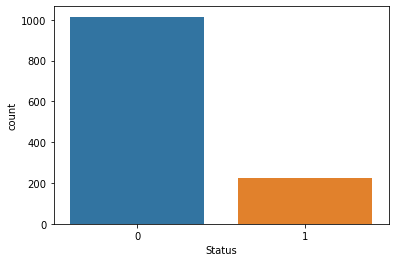

In [36]:
sns.countplot(x=df['Status'])
plt.show()

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(class_weight={0: 0.18, 1: 0.83})

In [38]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[289  17]
 [ 38  28]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       306
           1       0.62      0.42      0.50        66

    accuracy                           0.85       372
   macro avg       0.75      0.68      0.71       372
weighted avg       0.84      0.85      0.84       372



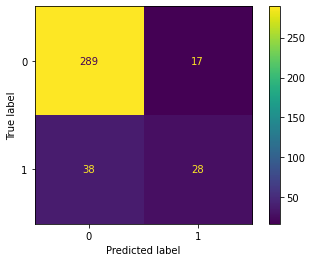

In [40]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import plot_confusion_matrix
cm = plot_confusion_matrix(rf, X_test, y_test)
cm

In [41]:
from sklearn.metrics import roc_auc_score
lr_auc1 = roc_auc_score(y_test, y_pred)
lr_auc1

0.6843434343434344

## Pickle File

In [42]:
import pickle
pickle.dump(rf,open("Model Classification","wb"))
model = pickle.load(open("Model Classification","rb"))

In [51]:
model.predict([[39,1000000,1,1,14,35420,21,4733403,19,2212,0,1980]])

array([0])